In [ ]:
!wget 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgHuaUQ0W8kYYgUYsgxiaO50-xyI3YuNg-Q-vOUjA2boon_mNfjuP68FAJVuE1_mdtt2SR0U6posdh0V8xIp5R7_9YnysoE3k5mfFgP7n26sn0Jt4DYq8onkB84KQMydSCbG-sP0JcG2yNHu2eh3ygl9SMCi5LzeSDJIfhv3i55yStYNvrj9j0a9BRRsA/s320/plant092_rgb.png'

--2023-05-28 19:23:36--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgHuaUQ0W8kYYgUYsgxiaO50-xyI3YuNg-Q-vOUjA2boon_mNfjuP68FAJVuE1_mdtt2SR0U6posdh0V8xIp5R7_9YnysoE3k5mfFgP7n26sn0Jt4DYq8onkB84KQMydSCbG-sP0JcG2yNHu2eh3ygl9SMCi5LzeSDJIfhv3i55yStYNvrj9j0a9BRRsA/s320/plant092_rgb.png
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184124 (180K) [image/png]
Saving to: ‘plant092_rgb.png.2’

plant092_rgb.png.2  100%[===================>] 179.81K  --.-KB/s    in 0.03s   

2023-05-28 19:23:36 (5.34 MB/s) - ‘plant092_rgb.png.2’ saved [184124/184124]



In [ ]:
# importing the needed classes to show and process the images
import cv2
from matplotlib import pyplot as plt

# reading input1 image
input1 = cv2.imread('plant092_rgb.png')
inputOrg = cv2.cvtColor(input1, cv2.COLOR_BGR2RGB)               # converting it from BGR to GRAY


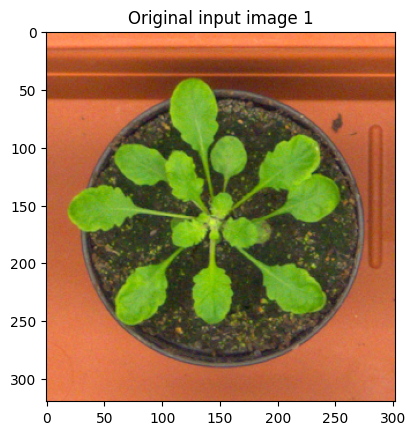

In [ ]:
plt.imshow(inputOrg)
plt.title("Original input image 1")
plt.show()

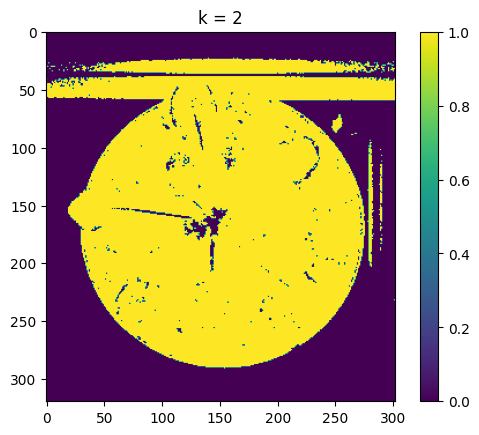

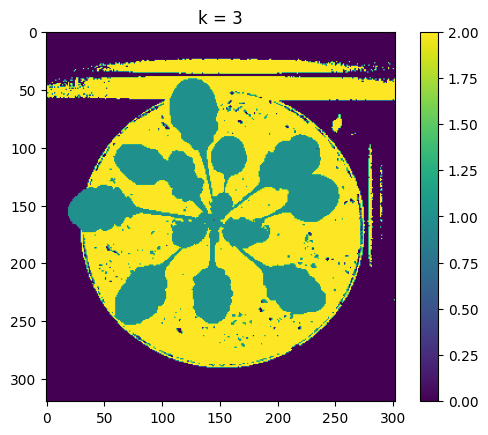

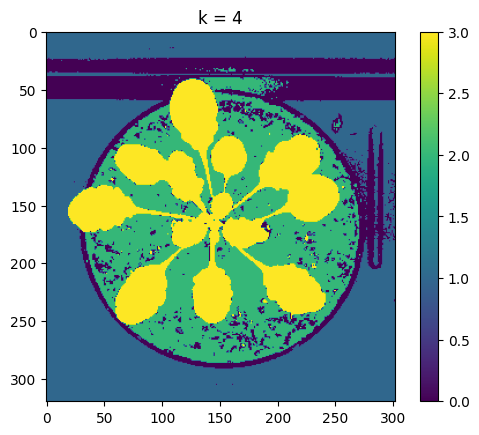

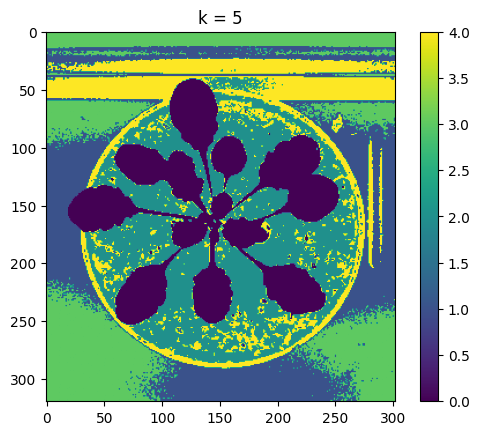

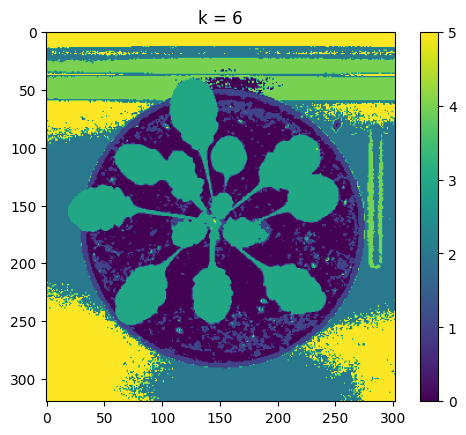

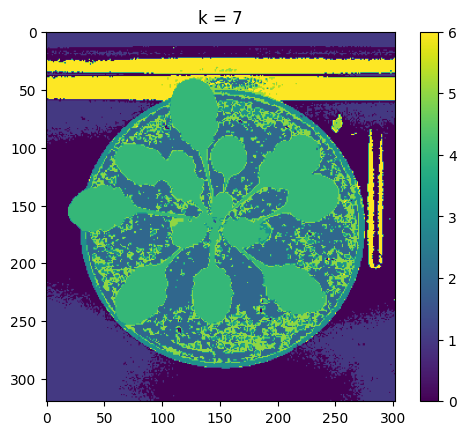

In [ ]:
import numpy as np

# Reshape the input1 image array into a two-dimensional array
pixels = input1.reshape(-1, 3).astype(np.float32)

# Define the termination criteria for the k-means algorithm
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ks = [2,3,4,5,6,7]

# Initialize a list to store the segmented images for different values of k
segmented_image = [input1, input1, input1, input1, input1, input1]
random_centers = cv2.KMEANS_RANDOM_CENTERS

# Start a loop to iterate over the values of k
for i in range(6):

  # Perform k-means clustering on the reshaped image pixels
  ret, labels, centers = cv2.kmeans(pixels, ks[i], None, criteria, 10, random_centers)

  # Reshape the cluster labels to match the shape of the input1 image and assigns it to the corresponding element in the segmented_image list
  segmented_image[i] = labels.reshape(input1.shape[:2])
  plt.imshow(segmented_image[i])
  plt.title("k = %d" %ks[i])
  plt.colorbar()
  plt.show()

**k=4 is better**

In [ ]:
ret, labels, centers = cv2.kmeans(pixels, ks[3], None, criteria, 10, random_centers)

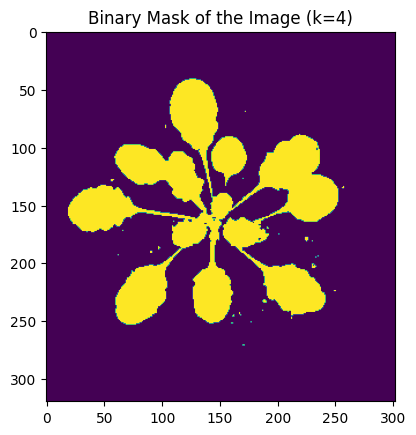

In [ ]:
# Identify the label corresponding to the plant segment
plant_label = np.argmax(centers[:, 1])

# Create a binary mask of the plant
binary_mask = np.uint8(labels == plant_label)

# Reshape the binary mask to match the original image shape
binary_mask = binary_mask.reshape(input1.shape[:2])

# Display the binary mask
plt.imshow(binary_mask)
plt.title("Binary Mask of the Image (k=4)")
plt.show()

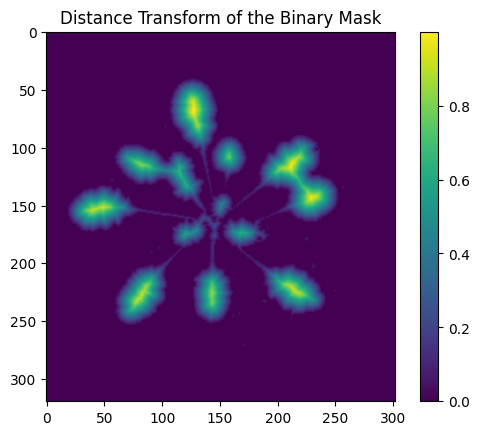

In [ ]:
# Calculate the distance transform
dist_transform = cv2.distanceTransform(binary_mask, cv2.DIST_L2, 3)

# Normalize the distance transform to range [0, 1] for visualization
normalized_dist_transform = cv2.normalize(dist_transform, None, 0, 1, cv2.NORM_MINMAX)

# Display the distance transform
plt.imshow(normalized_dist_transform)
plt.title("Distance Transform of the Binary Mask")
plt.colorbar()
plt.show()

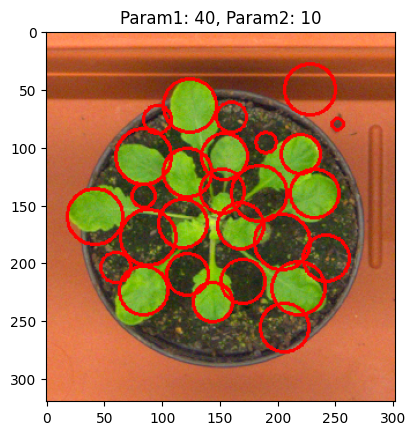

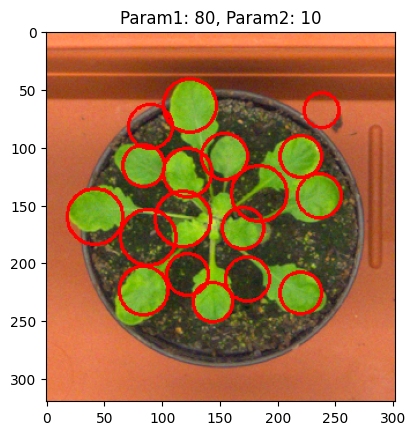

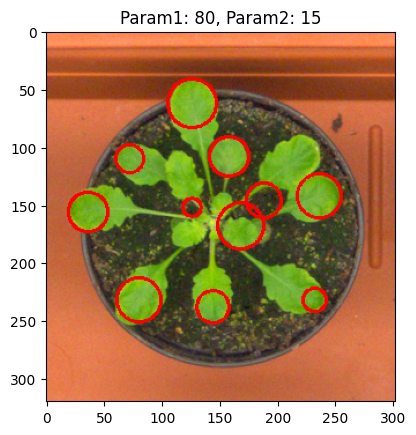

In [ ]:
# Determine the maximum value of the distance transform
max_distance = np.max(dist_transform)

# Determine the value at the center of smaller leaves
center_y, center_x = 155, 145
# Replace with the coordinates of a smaller leaf center
center_value = dist_transform[center_y, center_x]

# Determine appropriate values for minRadius and maxRadius
min_radius = int(center_value)
max_radius = int(1.25 * max_distance)

# Convert the original RGB image to the Lab color space and extract the a* channel
lab_image = cv2.cvtColor(input1, cv2.COLOR_BGR2Lab)
a_channel = lab_image[:, :, 1]

# Apply median filtering to the a* channel
filtered_a = cv2.medianBlur(a_channel, ksize=5)

# Detect circles using the HoughCircles function with different parameter settings
param_settings = [
    (40, 10),
    (80, 10),
    (80, 15)
]

for i, (param1, param2) in enumerate(param_settings):
    # Detect circles using the HoughCircles function
    circles = cv2.HoughCircles(filtered_a, cv2.HOUGH_GRADIENT, dp=1,
                               minDist=0.1 * min(input1.shape[:2]),
                               param1=param1, param2=param2,
                               minRadius=min_radius, maxRadius=max_radius)

    # Convert the image to RGB for visualization
    image_rgb = cv2.cvtColor(input1, cv2.COLOR_BGR2RGB)

    # Draw the detected circles on the original image
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(image_rgb, center, radius, (255, 0, 0), 2)

    # Display the result along with the corresponding parameters
    plt.imshow(image_rgb)
    plt.title(f'Param1: {param1}, Param2: {param2}')
    plt.show()


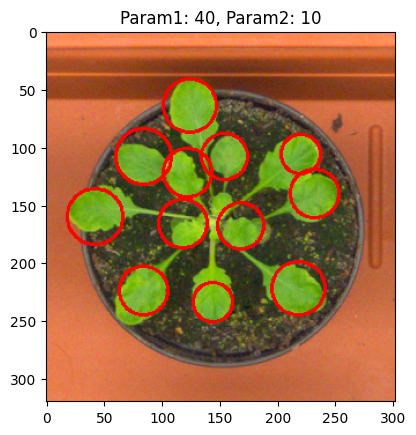

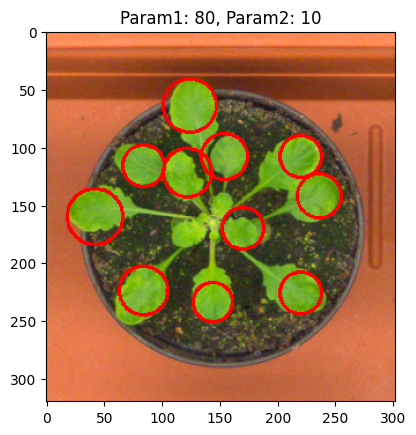

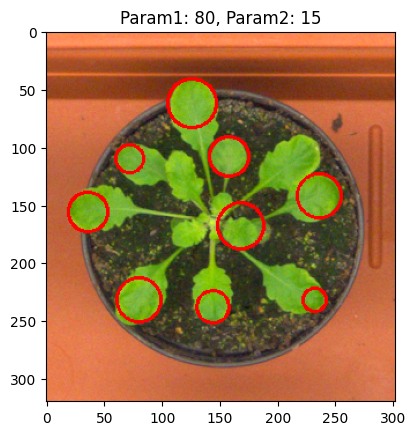

In [ ]:
for i, (param1, param2) in enumerate(param_settings):
    # Detect circles using the HoughCircles function
    circles = cv2.HoughCircles(filtered_a, cv2.HOUGH_GRADIENT, dp=1,
                               minDist=0.1 * min(input1.shape[:2]),
                               param1=param1, param2=param2,
                               minRadius=min_radius, maxRadius=max_radius)

    # Convert the image to RGB for visualization
    image_rgb = cv2.cvtColor(input1, cv2.COLOR_BGR2RGB)

    # Draw the detected circles on the original image (eliminating circles outside the plant)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            if binary_mask[center[1], center[0]] != 0:  # Check if the center is within the plant mask
                cv2.circle(image_rgb, center, radius, (255, 0, 0), 2)

    # Display the result along with the corresponding parameters
    plt.imshow(image_rgb)
    plt.title(f'Param1: {param1}, Param2: {param2}')
    plt.show()
